### FASE 3: BONUS - EVALUACIÓN FINAL - MÓDULO 3 - IRINA OSTOJIC

#### _IMPORTS_

In [30]:
# Importamos las librerías que vamos a utilizar

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [31]:
# Lectura de fichero
df = pd.read_csv("datasky_clean.csv")

In [35]:
# GUÍA DE COLORES QUE UTILIZAREMOS DURANTE ESTA FASE DEL EJERCICIO
colores_pop = [
    "lightcoral",      # rojo suave
    "lightskyblue",    # azul cielo
    "plum",            # morado pastel
    "peachpuff",       # melocotón
    "mediumaquamarine", # verde agua
    "palegreen",       # verde menta
    "khaki",           # amarillo suave
    "salmon",          # rosado cálido
    "thistle",         # lavanda
    "powderblue",      # azul polvo
    "lightpink"        # rosa claro
    ]

## FASE 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando el conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Tendremos en mente que los datos que tenemos son solo una muestra de una población. Para ello, los pasos que deberás seguir son: 

### 1. **Preparación de Datos:**
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [32]:
# Realizamos un filtrado y renombramos a las columnas
df_filtrado = df[['flights_booked', 'education']] 

df_filtrado.sample(5)

,flights_booked,education
82452,0,Bachelor
132304,0,Bachelor
221828,0,Bachelor
82367,2,Bachelor
169297,3,Bachelor


### 2. **Análisis Descriptivo:**
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, mediana, la desviación estándar) del número de vuelos reservados para cada grupo. Aquí, utilizamos estadística descriptiva normal.

In [33]:
# Calculamos media, mediana y desviación estándar
media_vuelos = df.groupby("education")['flights_booked'].mean().round(2).sort_values()
print(f"La media de vuelos reservados según nivel educativo se distribuye de la siguiente forma:")
display(media_vuelos.reset_index())

mediana_vuelos = df.groupby("education")['flights_booked'].median().round(2).sort_values()
print(f"La mediana de vuelos reservados según nivel educativo se distribuye de la siguiente forma:")
display(mediana_vuelos.reset_index())

std_vuelos = df.groupby("education")['flights_booked'].std().round(2).sort_values()
print(f"La desviación estandar de vuelos reservados según nivel educativo se distribuye de la siguiente forma:")
display(std_vuelos.reset_index())

# Lo hacemos todo en un mismo DataFrame
describe_vuelos = df.groupby("education")['flights_booked'].agg(["mean", "median", "std"]).round(2)
print(f"La media, mediana y desviación estándar de vuelos reservados según nivel educativo se distribuye de la siguiente forma:")
display(describe_vuelos.reset_index())

La media de vuelos reservados según nivel educativo se distribuye de la siguiente forma:


,education,flights_booked
0,Bachelor,4.11
1,College,4.17
2,Doctor,4.18
3,High School or Below,4.18
4,Master,4.20


La mediana de vuelos reservados según nivel educativo se distribuye de la siguiente forma:


,education,flights_booked
0,Bachelor,1.0
1,College,1.0
2,Doctor,1.0
3,High School or Below,1.0
4,Master,1.0


La desviación estandar de vuelos reservados según nivel educativo se distribuye de la siguiente forma:


,education,flights_booked
0,Master,5.21
1,Bachelor,5.22
2,High School or Below,5.24
3,College,5.25
4,Doctor,5.26


La media, mediana y desviación estándar de vuelos reservados según nivel educativo se distribuye de la siguiente forma:


,education,mean,median,std
0,Bachelor,4.11,1.0,5.22
1,College,4.17,1.0,5.25
2,Doctor,4.18,1.0,5.26
3,High School or Below,4.18,1.0,5.24
4,Master,4.20,1.0,5.21


- Observamos que la **media** es bastante similar en todos los niveles educativos, variando solo entre Bachelor (con un 4.11) y Master (con un 4.20), por lo que no parece que el nivel de educación tenga un impacto en la cantidad promedio de vuelos reservados.

- En cuanto a la **mediana** nos revela que la mayoría de personas reservan sólo un vuelo, independientemente de su valor educativo. Antes hemos observado que la media es mayor que la mediana, por lo que podemos intuir que hay unos pocos usuarios que reservan muchos vuelos, y por tanto, incrementan la media, generando una asimetría en los resultados.

- La **desviación estándar** es alta (alrededor de 5.21 y 5.26) comparada con la media (que estaba entre 4.11 y 4.20). Esto nos confirma que hay mucha variabilidad entre los usuarios: mientras la mayoría reserva pocos vuelos, algunos reservan muchos, lo que eleva la media. La variabilidad es prácticamente la misma para todos los niveles educativos, lo que refuerza la idea de que la educación no es un factor determinante en la reserva de vuelos.

Ahora vamos a presentarlo en una gráfica de tarta para hacerlo más visual. En ella veremos a qué porcentaje equivalen la media, la mediana y la desviación estándar.

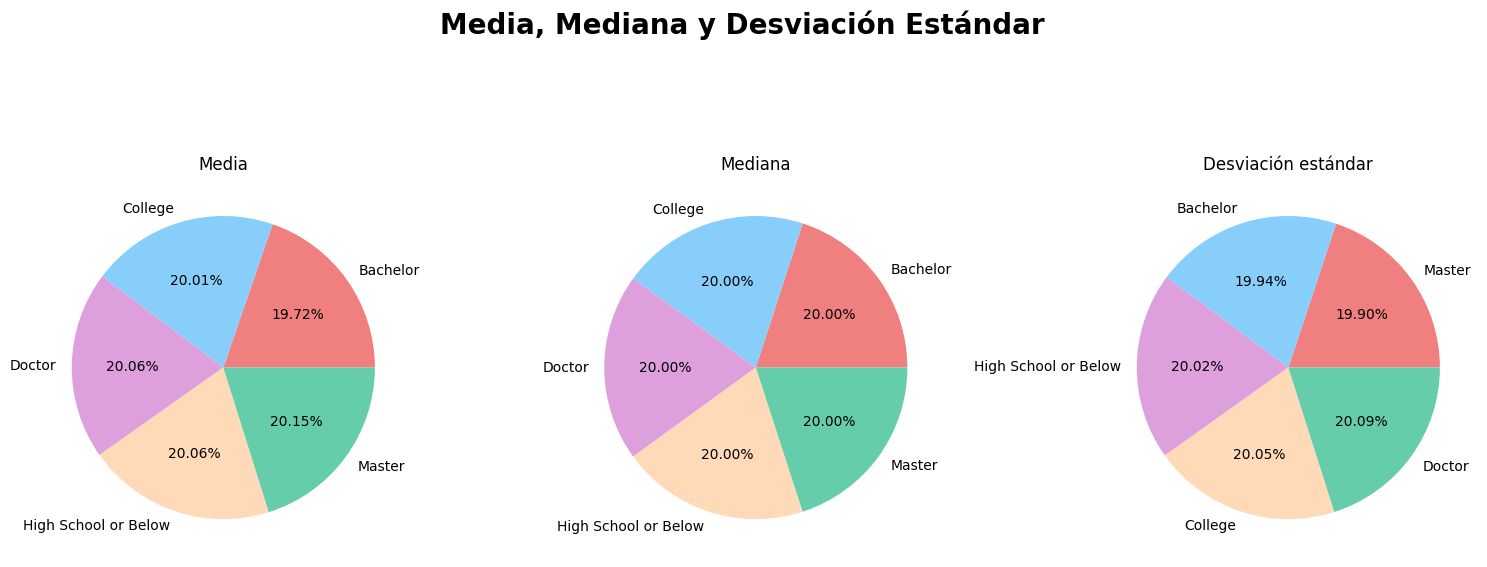

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

axes[0].pie(media_vuelos.values, 
            labels=media_vuelos.index, 
            autopct="%1.2f%%",
            colors=colores_pop)
axes[0].set_title("Media")

axes[1].pie(mediana_vuelos.values, 
            labels=mediana_vuelos.index, 
            autopct="%1.2f%%",
            colors=colores_pop)
axes[1].set_title("Mediana")

axes[2].pie(std_vuelos.values, 
            labels=std_vuelos.index, 
            autopct="%1.2f%%",
            colors=colores_pop)
axes[2].set_title("Desviación estándar")


fig.suptitle("Media, Mediana y Desviación Estándar", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show();

### 3. **Prueba Estadística:**
Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. Aquí utilizamos estadística inferencial.

In [ ]:
# Creamos una función para realizar pruebas de hipótesis

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas." if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas."
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

In [ ]:
# Refresco cuales eran los valores de mi columna education para poder hacer las variables que voy a utilizar con el método
df_filtrado["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [ ]:
# Creo las variables con máscaras
bachelor = df[df['education'] == "Bachelor"]["flights_booked"]
college = df[df['education'] == "College"]["flights_booked"]
master = df[df['education'] == "Master"]["flights_booked"]
highschool = df[df['education'] == "High School or Below"]["flights_booked"]
doctor = df[df['education'] == "Doctor"]["flights_booked"]

In [ ]:
# Aplicamos las hipótesis
print("Comparativa de Bachelor vs. College")
prueba_hipotesis(bachelor, college)
print("-"*100)
print("Comparativa de Bachelor vs. Master")
prueba_hipotesis(bachelor, master)
print("-"*100)
print("Comparativa de Bachelor vs. Highschool")
prueba_hipotesis(bachelor, highschool)
print("-"*100)
print("Comparativa de Bachelor vs. Doctor")
prueba_hipotesis(bachelor, doctor)
print("-"*100)
print("Comparativa de College vs. Master")
prueba_hipotesis(college, master)
print("-"*100)
print("Comparativa de College vs. Highschool")
prueba_hipotesis(college, highschool)
print("-"*100)
print("Comparativa de College vs. Doctor")
prueba_hipotesis(college, doctor)
print("-"*100)
print("Comparativa de Master vs. Highscholl")
prueba_hipotesis(master, highschool)
print("-"*100)
print("Comparativa de Master vs. Doctor")
prueba_hipotesis(master, doctor)
print("-"*100)
print("Comparativa de Highschool vs. Doctor")
prueba_hipotesis(highschool, doctor)

Comparativa de Bachelor vs. College

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 12834460862.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas.

----------------------------------------------------------------------------------------------------
Comparativa de Bachelor vs. Master

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 1532540228.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas.

----------------------------------------------------------------------------------------------------
Comparativa de Bachelor vs. Highschool

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Te

Podemos observar que no hay diferencias signficativas a excepción entre los niveles de educación de `Bachelor` con `Highschool`, con `Master` y con `College`.

Como estos resultados nos llaman la atención, vamos a calcular también un **intervalo de confianza**. 

Un intervalo de confianza coge una muestra sobre la población, hace la media y calcula el rango dentro del cual es probable que se encuentre la media real de la población con un nivel de confianza del 95%, por lo que sabremos con exactitud la precisión de esa media.

In [ ]:
# Nombramos a las variables para recorrerlas con un bucle for
variables = [bachelor, college, master, highschool, doctor]

# Establecemos los nombres en una lista para poder llamarlos también
nombres = ["Bachelor", "College", "Master", "Highschool", "Doctor"]

In [ ]:
# Calculamos el intervalo de confianza al 95%
for elemento in range(len(variables)): # por cada elemento que haya en el rango del tamaño de mis variables / len() da el tamaño y range genera una secuencia según ese tamaño
    columna = variables[elemento] # 'columna' será mis variables y el elemento que esté recorriendo
    nombre = nombres[elemento] # 'nombre' será el nombre de mis columnas y el elemento que esté recorriendo
    n = len(columna) # es el tamaño de la muestra, que será igual a los valores que tenga que "contar"
    confidence_interval = stats.t.interval( # declaro el método
        confidence=0.95, # le indico el grado de confianza (normalmente entre un 80% y un 95%)
        df=n - 1, # grados de libertad. siempre se pone así
        loc=columna.mean(), # calculamos la media
        scale=columna.std() / np.sqrt(n)) # la desviación estandar entre la raíz cuadrada de mi muestra
    print(f"Columna: {nombre}") # itero por los nombres 
    print(f"Media: {columna.mean():.2f}") # muestro el resultado de la muestra
    print(f"Intervalo de Confianza 95%: {confidence_interval}\n") # muestro el intervalo de confianza
    print("-"*100)

Columna: Bachelor
Media: 4.11
Intervalo de Confianza 95%: (np.float64(4.089923180552734), np.float64(4.1306519539660265))

----------------------------------------------------------------------------------------------------
Columna: College
Media: 4.17
Intervalo de Confianza 95%: (np.float64(4.1375900165274615), np.float64(4.201897564149245))

----------------------------------------------------------------------------------------------------
Columna: Master
Media: 4.20
Intervalo de Confianza 95%: (np.float64(4.108498991872502), np.float64(4.2929008616312005))

----------------------------------------------------------------------------------------------------
Columna: Highschool
Media: 4.18
Intervalo de Confianza 95%: (np.float64(4.1015398627328175), np.float64(4.250878852572496))

----------------------------------------------------------------------------------------------------
Columna: Doctor
Media: 4.18
Intervalo de Confianza 95%: (np.float64(4.098128606614446), np.float64(4.2528

Aunque hemos realizado el cálculo de todas las variables a nivel educativo, nos vamos a centrar en analizar la de `Bachelor`. Vemos que entre la media (4.11) y el intervalo de confianza (entre 4.08 y 4.13) no hay grandes diferencias, por lo que entendemos que la media estimada tiene una alta precisión. Esto refuerza la interpretación de los test de hipótesis. **Las diferencias significativas son reales, con un 95% de confianza.**

*CONCLUSIÓN FINAL*

No hemos encontrado que existan diferencias significativas en la reserva de vuelos según el nivel educativo del cliente, a excepción del grupo `Bachelor`, que presenta diferencias significativas frente a `Highschool`, `Master` y `College`.

El análisis de los intervalos de confianza muestra que la media de reservas de `Bachelor` está estimada con alta precisión, lo que refuerza que las diferencias observadas son reales.

En cambio, los demás grupos presentan medias muy similares entre sí, lo que indica que el nivel educativo, fuera de `Bachelor`, no influye de forma significativa en la reserva de vuelos.